First, let's change directory to the data folder:

In [1]:
import os

os.chdir('/Users/Georgiy/Documents/Data Challenge')

Second, check the contents of the "Data Challenge" folder:

In [2]:
ls

Yudintsev_HD_Data_Challenge_05_14_2019.html
data_challenge.csv
data_info.txt


Third, import python modules for data cleaning and wrangling (numpy, pandas), basic statistics (scipy.stats), and creating plots (pylab, matplotlib, matplotlib.pyplot):

In [3]:
import numpy as np
import pandas as pd
import pylab as plt

import scipy.stats

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

Read the data frame:

In [4]:
df = pd.read_csv('data_challenge.csv')

Now, let's take a quick summary look at the table:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                303 non-null int64
gender             303 non-null int64
chest_pain         303 non-null int64
restbp             303 non-null int64
cholestoral        303 non-null int64
high_fbs           303 non-null int64
EKG                303 non-null int64
thalachmax         303 non-null int64
angina_exercise    303 non-null int64
oldpeakST          303 non-null float64
slope              303 non-null int64
flouroscopy        303 non-null int64
thal               303 non-null int64
response           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


The data frame contains 303 observations, there are no missing values in the data.

Take a look at the first 10 rows of the dataframe:

In [6]:
df.head(10)

,age,gender,chest_pain,restbp,cholestoral,high_fbs,EKG,thalachmax,angina_exercise,oldpeakST,slope,flouroscopy,thal,response
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Let's take a look at the summary statistics of each variable:

In [7]:
df.describe()

,age,gender,chest_pain,restbp,cholestoral,high_fbs,EKG,thalachmax,angina_exercise,oldpeakST,slope,flouroscopy,thal,response
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Information about the variables:   
1. **age** - age in years  
2. **gender** - *(1 = male; 0 = female)*  
3. **chest_pain** - chest pain type *(ordered categorical)*  
4. **Restbp** - blood pressure *(in mm Hg on admission to the hospital)*  
5. **cholestoral** - cholestoral in mg/dl *(cholesterol level)*  
6. **High_fbs** - is fasting blood sugar > 120 mg/dl ? *(0 or 1, categorical, blood sugar level)*  
7. **EKG** - electrocardiographic results *(0 or 1, categorical)*  
8. **thalachmax** - heart rate achieved *(heart rate)* 
9. **angina_exercise** - induced angina *(1 = yes; 0 = no)*  
10. **oldpeakST** - depression induced by exercise relative to rest *(continuous)*  
11. **slope** - the slope of the peak exercise ST segment  
12. **flour_results** - number of major vessels (0-3) colored by flouroscopy  
13. **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect *(what does 1, 2, 3 mean?)*  
14. **Response** - 1 or 0 ; 0 being absence of heart disease *(categorical, 0 = no HD, 1 = HD)*  

**Intermediate Conclusion 1:**  
The data set contains a number of continuous and categorical variables, and no missing values (however, a more detailed look at each variable needs to be taken to ensure that the data entry makes sense and that there aren't any uninterpretable values). A potentially important direction to go would be finding out how well the data might predict the presense or absense of heart disease. Whether the data predicts heart diseases or not might be important for helping a physicians or other health providers make a correct clinical diagnosis.

In [8]:
gender_count = df['gender'].value_counts()
chest_pain_count = df['chest_pain'].value_counts()
fasting_blood_sugar = df['high_fbs'].value_counts()

print(gender_count,'\n')
print(chest_pain_count,'\n')
print(fasting_blood_sugar,'\n')

1    207
0     96
Name: gender, dtype: int64 

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64 

0    258
1     45
Name: high_fbs, dtype: int64 



In [9]:
EKG_count = df['EKG'].value_counts()
angina_exercise_count = df['angina_exercise'].value_counts()
heart_disease_count = df['response'].value_counts()

print(EKG_count,'\n')
print(angina_exercise_count,'\n')
print(heart_disease_count,'\n')

1    152
0    147
2      4
Name: EKG, dtype: int64 

0    204
1     99
Name: angina_exercise, dtype: int64 

1    165
0    138
Name: response, dtype: int64 



Plot the nominal and ordered categorical variables as bar plots for:
1. gender  
2. chest_pain  
3. high_fbs  
4. EKG  
5. angina_exercise  
6. response (a.k.a. Heart Disease)  

(-0.5, 1.5, 0, 200)

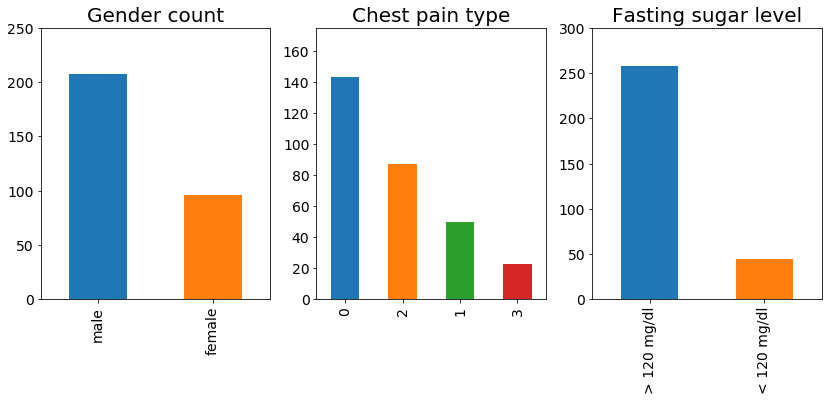

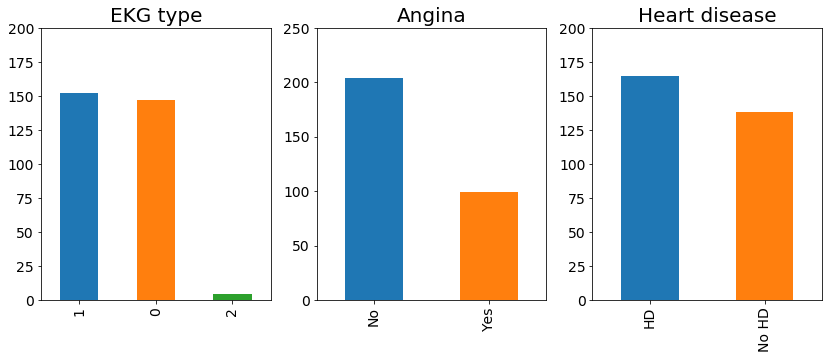

In [10]:
pp.figure(1, figsize = (14, 5))

pp.subplot(131)
gender_count.plot(kind = 'bar', fontsize = 14)
pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Gender count', fontsize = 20)
pp.axis(ymin = 0, ymax = 250)

pp.subplot(132)
chest_pain_count.plot(kind = 'bar', fontsize = 14)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Chest pain type', fontsize = 20)
pp.axis(ymin = 0, ymax = 175)

pp.subplot(133)
fasting_blood_sugar.plot(kind = 'bar', fontsize = 14)
pp.xticks(np.arange(2), labels = ('> 120 mg/dl', '< 120 mg/dl'))
pp.title('Fasting sugar level', fontsize = 20)
pp.axis(ymin = 0, ymax = 300)



pp.figure(2, figsize = (14, 5))

pp.subplot(131)
EKG_count.plot(kind = 'bar', fontsize = 14)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('EKG type', fontsize = 20)
pp.axis(ymin = 0, ymax = 200)

pp.subplot(132)
angina_exercise_count.plot(kind = 'bar', fontsize = 14)
pp.xticks(np.arange(2), labels = ('No', 'Yes'))
pp.title('Angina', fontsize = 20)
pp.axis(ymin = 0, ymax = 250)

pp.subplot(133)
heart_disease_count.plot(kind = 'bar', fontsize = 14)
pp.xticks(np.arange(2), labels = ('HD', 'No HD'))
pp.title('Heart disease', fontsize = 20)
pp.axis(ymin = 0, ymax = 200)

**Intermediate Conclusion 2:**  
Certain categories are unballanced, which could be a problem, especially in case when we are interested in predicting the outcome of those categories. The problem of unbalanced classes would need to be dealt with to improve recall of responses from small classes. There are several ways to deal with unbalanced data: downsampling of larger classes, upsampling of smaller classes, SMOTE techniques. However, collecting more data, whenever possible, would usually be the best solution.   
   
*The Heart Diseases categories are fairly balanced, therefore, modeling the prediction for heart diseases should not run into the problems due to extreme class imbalance.*

Plot the remaining continuous variables as histograms:

In [11]:
Slope_count = df['slope'].value_counts()
Fluoroscopy_count = df['flouroscopy'].value_counts()
Thal_count = df['thal'].value_counts()

print(Slope_count,'\n')
print(Fluoroscopy_count,'\n')
print(Thal_count,'\n')

2    142
1    140
0     21
Name: slope, dtype: int64 

0    175
1     65
2     38
3     20
4      5
Name: flouroscopy, dtype: int64 

2    166
3    117
1     18
0      2
Name: thal, dtype: int64 



(-0.5, 3.5, 0, 174.3)

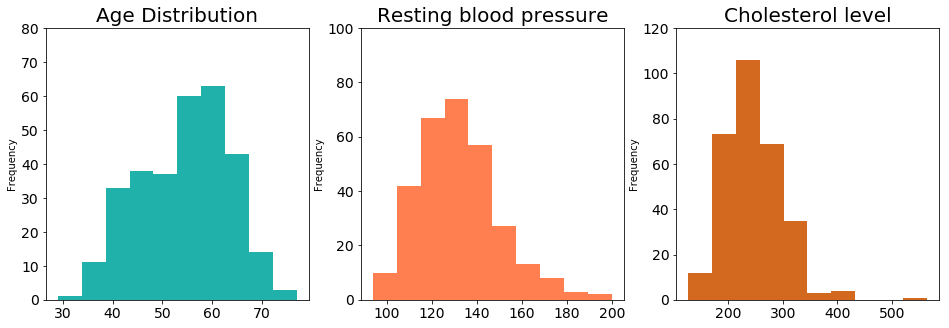

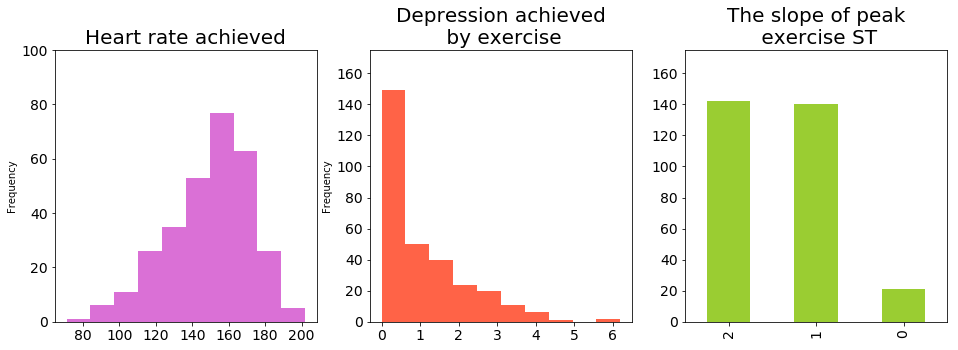

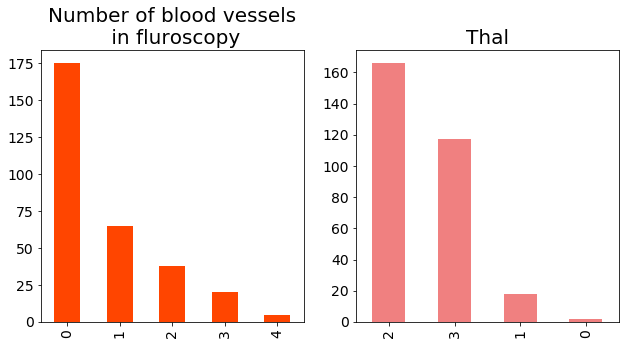

In [12]:
pp.figure(3, figsize = (16, 5))

pp.subplot(131)
df['age'].plot(kind = 'hist', fontsize = 14, bins = 10, color = 'lightseagreen')
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Age Distribution', fontsize = 20)
pp.axis(ymin = 0, ymax = 80)

pp.subplot(132)
df['restbp'].plot(kind = 'hist', fontsize = 14, color = 'coral') #bins = 10)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Resting blood pressure', fontsize = 20)
pp.axis(ymin = 0, ymax = 100)

pp.subplot(133)
df['cholestoral'].plot(kind = 'hist', fontsize = 14, color = 'chocolate') #bins = 10)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Cholesterol level', fontsize = 20)
pp.axis(ymin = 0, ymax = 120)



pp.figure(4, figsize = (16, 5))

pp.subplot(131)
df['thalachmax'].plot(kind = 'hist', fontsize = 14, bins = 10, color = 'orchid')
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Heart rate achieved', fontsize = 20)
pp.axis(ymin = 0, ymax = 100)
        
pp.subplot(132)
df['oldpeakST'].plot(kind = 'hist', fontsize = 14, color = 'tomato') #bins = 10)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Depression achieved\n by exercise', fontsize = 20)
pp.axis(ymin = 0, ymax = 175)

pp.subplot(133)
Slope_count.plot(kind = 'bar', fontsize = 14, color = 'yellowgreen') #bins = 10)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('The slope of peak\n exercise ST', fontsize = 20)
pp.axis(ymin = 0, ymax = 175)



pp.figure(5, figsize = (16, 5))

pp.subplot(131)
Fluoroscopy_count.plot(kind = 'bar', fontsize = 14, color = 'orangered')
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Number of blood vessels\n in fluroscopy', fontsize = 20)
pp.axis(ymin = 0)
        
pp.subplot(132)
Thal_count.plot(kind = 'bar', fontsize = 14, color = 'lightcoral') #bins = 10)
# pp.xticks(np.arange(2), labels = ('male', 'female'))
pp.title('Thal', fontsize = 20)
pp.axis(ymin = 0)

**Intermediate Conclusion 3:**  
Resing blood pressure, cholesterol level and depression achieved by exercise are all right-skewed, while heart rate achieved is slightly left-skewed. The skewdness of the distributions would present a problem if one of these measures were modeled as a response in linear regression, as one of the key assumptions of the linear regression model is normally dirstributed response variable. If we were interested in modeling and predictring resting blood pressure or cholesterol level using linear models, the data would need to be transformed first (box-cox transformations), to satisfy the assumption of normality. 

**Potential Outliers:**   
There might also be some outliers in this data set. It would be important to examine these outliers. Are they a measurement error? Is there something special about those patients? For example a patient with very high cholesterol level. What about the patients with level 6 in 'depression achieved by exercise' test?

**Next Steps:**  
Below, I would like to look at the correlations between the features in the data set. The presence of strong correlations among predictors in a regression model give rise to the probelm of multicollinearity. The presence of multicollinearity leads to incorrect estimation of coefficients in linear models, for example. After examining the correlations, I would like to try a logistic regression model fit first.

In [13]:
corr = df[['age', 'gender', 'chest_pain', 'restbp', 'cholestoral', 'high_fbs',
           'EKG', 'thalachmax', 'angina_exercise', 'oldpeakST', 'slope', 'flouroscopy', 'thal',
           'response']].corr()
corr

,age,gender,chest_pain,restbp,cholestoral,high_fbs,EKG,thalachmax,angina_exercise,oldpeakST,slope,flouroscopy,thal,response
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
restbp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
high_fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
EKG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachmax,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
angina_exercise,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeakST,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


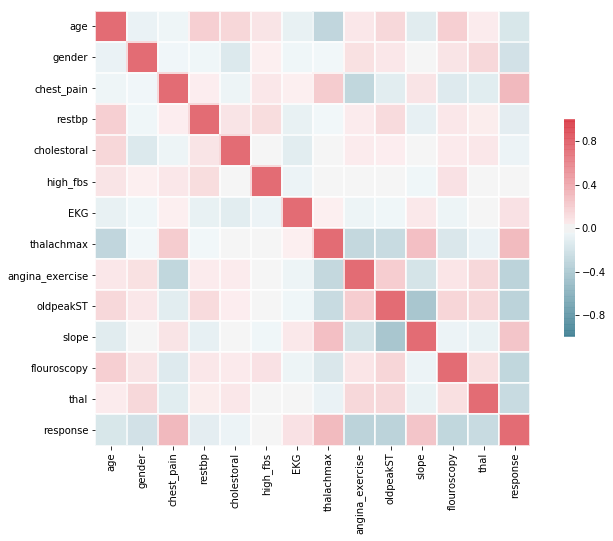

In [33]:
import seaborn as sns

f, ax = pp.subplots(figsize=(12, 8))
corr_features = sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool),
                            vmin = -1, vmax = 1,
                            cmap=sns.diverging_palette(220, 10, as_cmap=True),
                            square=True, ax=ax, linewidths=1,
                            cbar_kws={"shrink": .5}, alpha = 0.75)

I could also cluster the correlations, such that similar values are closer to each other. Having these clusters make it easier to inspect correlated features, which can be taken into account when deciding which features to include in the model to avoid multicollinearity.

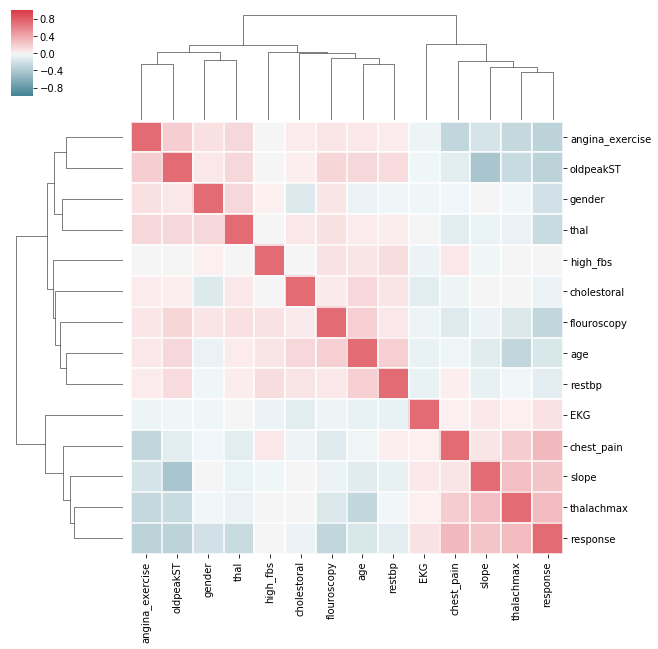

In [39]:
corr_clusters = sns.clustermap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
                               vmin = -1, vmax = 1,
                               square=True, linewidths=1, alpha = 0.75)

**Intermediate Conclusion 4:**  
Many of the features are moderately correlated with each other. This redundant information may negatively affect the fit of linear models. I am thinking to use logistic regression to predict the presence of heart disease in this data set. Therefore, I will see if I can use Recursive Feature Elimination to extract the most important predictors of heart disease.  
  
1. First, I will try to fit a logistic regression using the complete feature space.  
  
2. Second, I will try to reduce the number of features (to make the model potentially easier to interpet, as well as improve the model fit).  
    
*Recursive Feature Elimination is a feature selection algorithm commonly used in linear models. It works by iteratilvely eliminating features which bring least weight (smalled coefficient) in the specified type of regression model.*

**Implementation of Logistic Regression:**  
* Y-variable (response) is heart disease (HD), with 1 standing for the presence of HD, and 0 stading for the absence of HD.  
* X is the matrix of predictors, includes all other features provided (13 features, n = 303)

**Creating Dummy Variables:**  
For logistic regression to fit properly, first categorical variables need to me dummy-coded. These variables are gender, high-fbs, and angina_exercise. To avoid multicollinearity, we will remove redundant information by dropping one dummy-coded variable from each of the groups. I'll drop the variables for 0's, and leave the variables for 1's. Which means that 1 codes for 'male' in gender_1 dummy, '> 120 mg/dl' for high_fbs_1, and 'yes' for the presence of induced angina in 'angina_exercise_1'.

In [15]:
# Getting dummies for categorical variables:
df_dummies = pd.get_dummies(df, columns = ['gender', 'high_fbs', 'angina_exercise'])

In [16]:
df_dummies = df_dummies.drop(labels = ['gender_0', 'high_fbs_0', 'angina_exercise_0'],
                             axis = 1)

In [17]:
df_dummies.head(5)

,age,chest_pain,restbp,cholestoral,EKG,thalachmax,oldpeakST,slope,flouroscopy,thal,response,gender_1,high_fbs_1,angina_exercise_1
0,63,3,145,233,0,150,2.3,0,0,1,1,1,1,0
1,37,2,130,250,1,187,3.5,0,0,2,1,1,0,0
2,41,1,130,204,0,172,1.4,2,0,2,1,0,0,0
3,56,1,120,236,1,178,0.8,2,0,2,1,1,0,0
4,57,0,120,354,1,163,0.6,2,0,2,1,0,0,1


Let's create the X matrix of predictors and the y vector of response:

In [18]:
X = df_dummies[['age', 'chest_pain', 'restbp',
        'cholestoral', 'EKG', 'thalachmax', 'oldpeakST', 'slope', 'flouroscopy',
        'thal', 'gender_1', 'high_fbs_1', 'angina_exercise_1']]
y = df_dummies['response']

**Testing and Training Data Sets:**  
An important step that we will need to do later is validate the model. This could be done on a testing data set. Therefore, I would like to split the data into a training (80% of the data) and test (the remaining 20% of the data) sets. The training set will be used to train the model, while the test set will be used to assess the model performance on data it hasn't previously seen.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

**Fitting the Model Using the Training Set:**  
First, I will initialize a LogisticRegression object and then fit a logistic regression model using previously randomly sampled training set.

In [20]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/Users/Georgiy/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Second, now that the model has been created, I will use it to make predictions of y (Heart Diseases) on the testing set:

In [21]:
y_pred = regressor.predict(X_test)

Third, let's create table comparing the actual and predicted outcomes, and look at the first ten observations. Remember, the training and testing split was based on random sampling without replacement, so the indices here aren't ordered:

In [22]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred.head(10)

,Actual,Predicted
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
245,0,0
175,0,0
168,0,0
223,0,0
217,0,0


**Confusion Matrix:**  
The confusion matrix is a useful way to assess logistic regression performance. It can tell us how well the model predicts positive and negative classes (Heard Disease vs No Heart Disease).

In [23]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(conf_mat, columns=['Predicted Positive', 'Predicted Negative'],
                           index=['Actual Positive', 'Actual Negative'])
conf_mat_df.head()

,Predicted Positive,Predicted Negative
Actual Positive,22,5
Actual Negative,4,30


From the confusion matrix, we can get the number of true positives (correctly predicted positive values), true negatives (correctly predicted negative values), as well as the false positive and false negatives.

In [24]:
print('# of True Positives = {TP}'.format(TP = conf_mat_df.iloc[0,0]))
print('# of False Negatives = {FN}'.format(FN = conf_mat_df.iloc[0,1]))
print('# of False Positives = {FP}'.format(FP = conf_mat_df.iloc[1,0]))
print('# of True Negatives = {TN}'.format(TN = conf_mat_df.iloc[1,1]))

# of True Positives = 22
# of False Negatives = 5
# of False Positives = 4
# of True Negatives = 30


Using the values from the confusion matrix, we could also calculate precision and recall.  
Precision is the model's ability to identify positives and not label them as negatives (precision = tp/(tp + fp)).  
Recall is calculated as tp/(tp + fn), and it is the model's ability to identify all positive values, which may be hard to do when classes are imbalanced.

In [25]:
from sklearn.metrics import classification_report

print('\n', classification_report(y_test, y_pred), '\n')


               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 



The mean accuracy and R-squares of the model are:

In [26]:
mean_accuracy = regressor.score(X_test, y_test)
print(f'Mean Accuracy = {mean_accuracy:.2f}')

Mean Accuracy = 0.85


**Response Operating Characteristic Curve:**  
The Response Operating Characteristic curve (or the ROC curve), is a useful way to look at model performance. False positive rate is plotted against true positive rate, and provides useful information in choosing the threshold for our model. For example, identifying true positives (Heart Disease) might be very important, and if that's the case, we'd set the threshold lower. The ROC curve will tell what false positive rate would be in at that threshold.

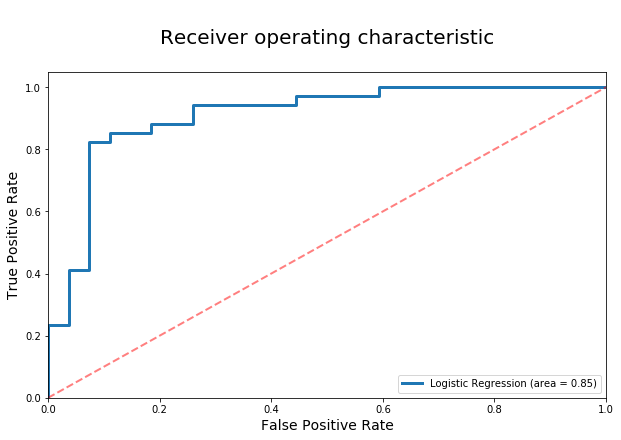

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, regressor.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:,1])
pp.figure(figsize = (10, 6))
pp.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, linewidth = '3')
pp.plot([0, 1], [0, 1],'r--', linewidth = '2', alpha = 0.5)
pp.xlim([0.0, 1.00])
pp.ylim([0.0, 1.05])
pp.xlabel('False Positive Rate', fontsize = 14)
pp.ylabel('True Positive Rate', fontsize = 14)
pp.title('\nReceiver operating characteristic\n', fontsize = 20)
pp.legend(loc="lower right")
pp.show()

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f'R-squared = {r2:.2f}')

R-squared = 0.40


**FINAL CONCLUSIONS AND REMARKS**  

**Summary of Model Performance:**  
Overall, the current model preformance is fairly good. Its precision is 0.85 and recall of 0.81. The overall accuracy of the model is 0.85, and the R^2 value is 0.40, indicating a fair fit. Although, given the importance of accurately predicting Heart Diseases, I would try to improve model performance. I would start by looking into the methods described below.  
  
**Next Steps (if I had more time):**  
    
**1. Dimensionality Reduction**  
These performance measures would likely be improved with optimizing the feature space, for example, by excluding some of the correlated features that provide redundant information. Recursive feature elimination is the place where I would start to try to reduce the number of features. However, other methods for dimensionality reduction exist as well (although I am less familiar with them), such as the Principal Component Analysis (PCA).  

**2. Inclusion of Interactions**  
As opposed to dimentionality reduction, had I had more time, I would also explore the presence of interactions in the data set, and include important interactions in the space of predictors. It is possible that there are some important interactions in these data that would explain even more of the variance in response variable 'y'. After adding the interactions, I would use similar dimentionality reduction techniques described above, to reduce the feature space (so that only important interactions remain in the model, and no overfitting occurs).

**3. Dealing with class imbalance**  
I would also try to address the slight class imbalance we had in Heart Disease, which would further improve the model, particularly the recall. I would probably try SMOTE (*Synthetic Minority Over-sampling TEchnique*), which would increase the number of Heart Disease data points by synthetizing new rows of data based on the classified Heart Disease rows we already have.

**4. Using a Different Model**  
Logistic regression, for the type of problem I picked, is a method that boasts clear interpretability. When the underslying assumptions (those that apply to Generalized Linear Models) of this method are met, it is also rigorous. However, if the assumptions are seriously violated, different methods could be tried. For example, Random Forest Classification is known to perform well on features that aren't normalized or scaled, and is is not sensitive to multicollinearity of the predictor variables. If I had more time, I would be curious to compare the performance of  Random Forest Classifier with Logistic Regression. Other classificaions might also be useful, such as Support Vector Machines, although I am much less familiar with those methods at this point.

**PS:**  
Here is *Recursive Feature Elimination (RFE)* code that I used to select features, although I did not get to the stage of building a new model using the features selected through RFE. Just to introduce briefly what it does, you can specify the type of the model (LogisticRegression) in my case, provide X and y, and specify the number of predictors to select from X. The algorithm looks at the weight of each predictor, in an iterative fashion, and picks the top predictors based on the number of predictors we would like to keep. I like this method of dimensionality reduction, as opposed to the PCA, because it preserves the interpretablity of our predictors, which PCA may not.

In [29]:
import warnings
warnings.filterwarnings('ignore') # to supress warnings associated with output of Recursive Feature Elimination.

In [107]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df_dummies.values

X = array[:,[0,1,2,3,4,5,6,7,8,9,11,12,13]]
Y = array[:,10]

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 7) # 5 here is the number of most important features to select from the feature space.
fit = rfe.fit(X, Y)

print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')

Num Features: 7
Selected Features: [False  True False False False False  True  True  True  True  True False
  True]
Feature Ranking: [5 1 4 7 2 3 1 1 1 1 1 6 1]


**PPS:**  
Try a logistic regression model with some features excluded based on Recursive Feature Elimination. I ran recursive feature elimination algorithm, trying to reduce the number of features to 7. I was curious to see how the model with 7 and 13 features compare.

So, X_1 below contains the 7 features with highest importance, based on the results of recursive feature elimination:

In [119]:
X_1 = df_dummies[['chest_pain', 'oldpeakST', 'slope', 'flouroscopy',
        'thal', 'gender_1', 'angina_exercise_1']]
y_1 = df_dummies['response']

I split the data into the testing and training sets as before:

In [120]:
from sklearn.model_selection import train_test_split

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2,
                                                    random_state=0)

And train the logistic regression model 'regressor_1':

In [110]:
from sklearn.linear_model import LogisticRegression

regressor_1 = LogisticRegression()
regressor_1.fit(X_1_train, y_1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now, let's look at this models performance, and then plot the ROC curves in one plot.

In [121]:
y_1_pred = regressor_1.predict(X_1_test)

In [122]:
df_1_pred = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_1_pred})
df_1_pred.head(10)

,Actual,Predicted
225,0,0
152,1,1
228,0,1
201,0,0
52,1,0
245,0,0
175,0,0
168,0,0
223,0,0
217,0,0


In [123]:
from sklearn.metrics import confusion_matrix

conf_mat_1 = confusion_matrix(y_1_test, y_1_pred)
conf_mat_df_1 = pd.DataFrame(conf_mat_1, columns=['Predicted Positive', 'Predicted Negative'],
                           index=['Actual Positive', 'Actual Negative'])
conf_mat_df_1.head()

,Predicted Positive,Predicted Negative
Actual Positive,20,7
Actual Negative,3,31


In [124]:
print('# of True Positives = {TP}'.format(TP = conf_mat_df_1.iloc[0,0]))
print('# of False Negatives = {FN}'.format(FN = conf_mat_df_1.iloc[0,1]))
print('# of False Positives = {FP}'.format(FP = conf_mat_df_1.iloc[1,0]))
print('# of True Negatives = {TN}'.format(TN = conf_mat_df_1.iloc[1,1]))

# of True Positives = 20
# of False Negatives = 7
# of False Positives = 3
# of True Negatives = 31


In [125]:
from sklearn.metrics import classification_report

print('\n', classification_report(y_1_test, y_1_pred), '\n')


               precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.82      0.91      0.86        34

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61
 



**Intermediate Conclusion:**  
Removing 6 features based on the results of Recursive Feature Elimination improved the precision of our model, however, the recall decreased, as well as the overall performance of the model as indicated by a small drop in f1 score. However, if we did want to optimize for precision, the results of the second model would be more useful.

In [126]:
mean_accuracy_1 = regressor_1.score(X_1_test, y_1_test)
print(f'Mean Accuracy = {mean_accuracy_1:.2f}')

Mean Accuracy = 0.84


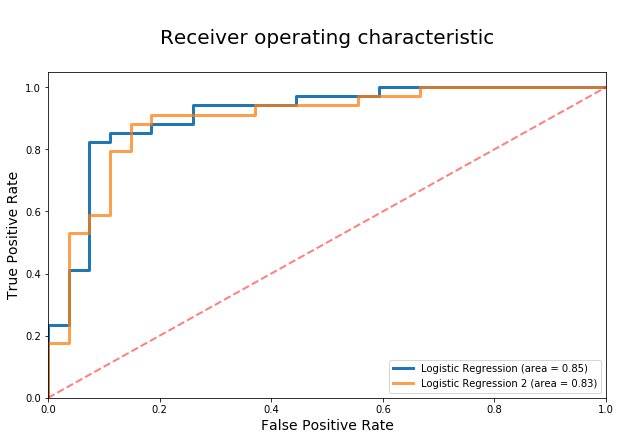

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, regressor.predict(X_test))
logit_roc_auc_1 = roc_auc_score(y_1_test, regressor_1.predict(X_1_test))

fpr, tpr, thresholds = roc_curve(y_test, regressor.predict_proba(X_test)[:,1])
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1_test, regressor_1.predict_proba(X_1_test)[:,1])

pp.figure(figsize = (10, 6))

pp.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, linewidth = '3')
pp.plot(fpr_1, tpr_1, label='Logistic Regression 2 (area = %0.2f)' % logit_roc_auc_1, linewidth = '3', alpha = 0.75)


pp.plot([0, 1], [0, 1],'r--', linewidth = '2', alpha = 0.5)
pp.xlim([0.0, 1.00])
pp.ylim([0.0, 1.05])
pp.xlabel('False Positive Rate', fontsize = 14)
pp.ylabel('True Positive Rate', fontsize = 14)
pp.title('\nReceiver operating characteristic\n', fontsize = 20)
pp.legend(loc="lower right")
pp.show()

In [128]:
from sklearn.metrics import r2_score

r2_1 = r2_score(y_1_test, y_1_pred)

print(f'R-squared = {r2_1:.2f}')

R-squared = 0.34


The slight improvement in precision is noticeable when we compare blue and orange ROC curves. For example, at a love false positive rate (about 0.05), we get roughly a 20% improvement  in correctly identifying true positives.If this result was important to us, we could use the second model. Otherwise, I prefer the first model because of its overall better performance.